# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
from scipy.stats import uniform, loguniform

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('marketing_campaign.csv',sep=';')

# Pre-Processing

- Handle missing values
- Handle duplicated data
- Handle outliers
- Feature encoding

## Handle missing values

In [3]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
df.shape

(2240, 29)

In [5]:
#persentasi missing data
percent_na = (df.isna().sum().sum())/(df.shape[0])*100
print(f'{round(percent_na,2)}%')

1.07%


In [6]:
#Karena missing value sekitar 1% dari dataset kita akan drop
df = df.dropna(axis=0)

Missing value hanya terdapat pada kolom income dengan jumlah 24, nilai ini cenderung kecil dibandingkan dengan keseluruhan data (2240) sehingga diperkirakan tidak akan berpengaruh pada model. Dengan presentase 1% missing terhadap total data maka akan didrop.


## Handle duplicated data

In [7]:
df.duplicated().sum()

0

Tidak terdapat data duplicate pada dataset

## Handle outliers

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


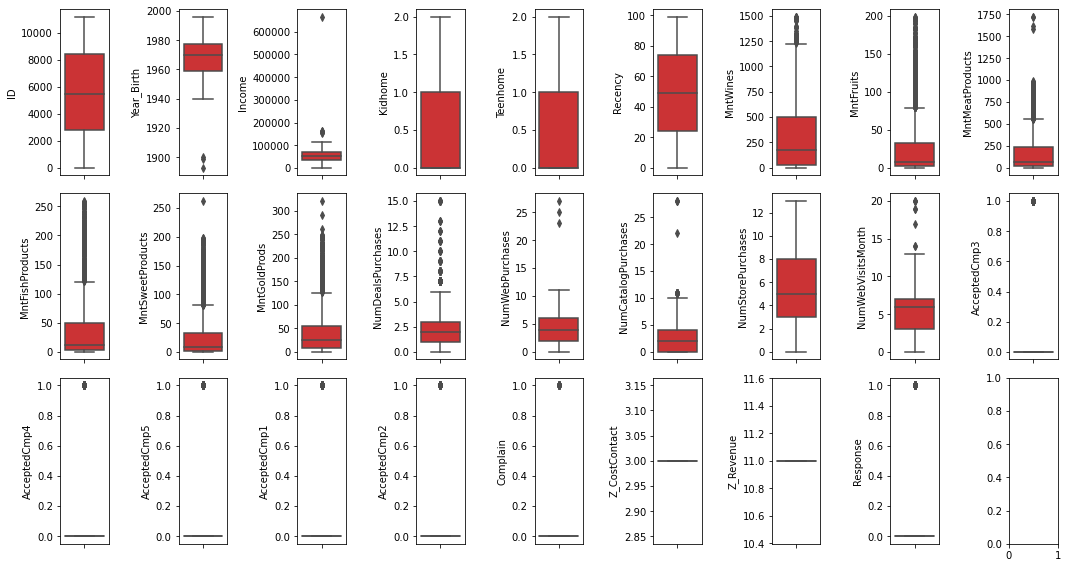

In [9]:
dft = df.copy()
num = [i for i in df.columns if df[i].dtype != 'object']

fig, ax = plt.subplots(3,9,figsize=(15,8))

a=0
b=0
for i in num:
    sns.boxplot(data=dft,y=i,ax=ax[a,b],palette='Set1')
    b += 1
    if b == 9:
        a += 1
        b = 0

plt.tight_layout()
plt.show()

In [10]:
#Terdapat outliers yang sangat ekstrem pada kolom Income dan Year_Birth sehingga akan 
#kita coba bandingkan presentase outliers dengan IQR dan Z Score

def check_outliers(x):
    global df
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - (1.5 * iqr)
    hi_lim = q3 + (1.5 * iqr)
    filterred = ((df[x]<low_lim) | (df[x]>hi_lim))
    df_out = df[filterred]
    percent_out = (df_out.shape[0])/(df.shape[0])*100
    print(f'Presentase outlier {x}:',round(percent_out,2),'%')

for i in num:
    check_outliers(i)

Presentase outlier ID: 0.0 %
Presentase outlier Year_Birth: 0.14 %
Presentase outlier Income: 0.36 %
Presentase outlier Kidhome: 0.0 %
Presentase outlier Teenhome: 0.0 %
Presentase outlier Recency: 0.0 %
Presentase outlier MntWines: 1.58 %
Presentase outlier MntFruits: 11.1 %
Presentase outlier MntMeatProducts: 7.85 %
Presentase outlier MntFishProducts: 10.02 %
Presentase outlier MntSweetProducts: 11.1 %
Presentase outlier MntGoldProds: 9.25 %
Presentase outlier NumDealsPurchases: 3.79 %
Presentase outlier NumWebPurchases: 0.14 %
Presentase outlier NumCatalogPurchases: 1.04 %
Presentase outlier NumStorePurchases: 0.0 %
Presentase outlier NumWebVisitsMonth: 0.36 %
Presentase outlier AcceptedCmp3: 7.36 %
Presentase outlier AcceptedCmp4: 7.4 %
Presentase outlier AcceptedCmp5: 7.31 %
Presentase outlier AcceptedCmp1: 6.41 %
Presentase outlier AcceptedCmp2: 1.35 %
Presentase outlier Complain: 0.95 %
Presentase outlier Z_CostContact: 0.0 %
Presentase outlier Z_Revenue: 0.0 %
Presentase outlie

Karena outliers mayoritas dibawah 1% maka kita akan menggunakan Zscore untuk handling outliers. Kolom Response kita exclude karena merupakan target dan kolom AcceptedCmp dan Complain yang merupakan categorical

In [11]:
num

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [12]:
#Handling outliers pada beberapa kolom dengan Zscoe
num_outlier = ['Year_Birth','Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 
               'NumWebVisitsMonth']
df_before = df[num_outlier].copy() #DataFrame Sebagai perbandingan

outliers_ = [num_outlier] #List outliers

def zscore_handling(x):
    global df
    z_score = np.abs(stats.zscore(df[x]))
    filtered = (z_score < 3)
    df = df[filtered]

# for i in outliers_:
#     zscore_handling(i)
zscore_handling('Year_Birth')
zscore_handling('Income')

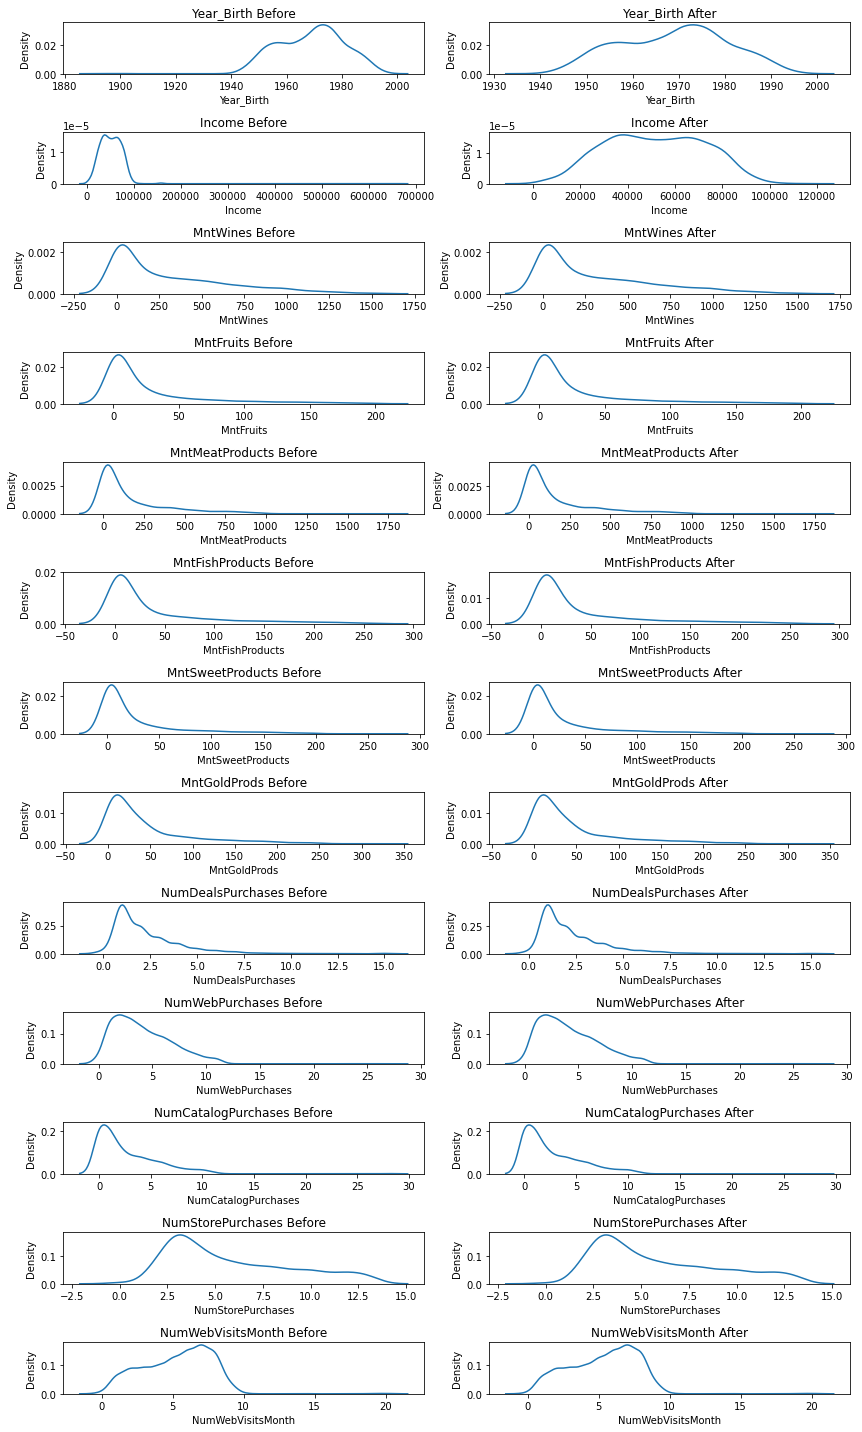

In [13]:
dft = df.copy()
num = [i for i in df.columns if df[i].dtype != 'object']

fig, ax = plt.subplots(len(num_outlier),2,figsize=(12,20))

a=0
b=0
for i in range(0,len(num_outlier)):
    # sns.boxplot(data=dft,y=i,ax=ax[a,b],palette='Set1')
    sns.kdeplot(data=df_before,x=num_outlier[i],ax=ax[i,0])
    ax[i,0].set_title(f'{num_outlier[i]} Before')
    sns.kdeplot(data=df,x=num_outlier[i],ax=ax[i,1])
    ax[i,1].set_title(f'{num_outlier[i]} After')
    b += 1
    if b == 2:
        a += 1
        b = 0

plt.tight_layout()
plt.show()

Pada beberapa kolom terlihat perbedaan distribusi yang menuju distribusi normal

## Feature encoding
Kita lakukan label encode(LE) dan One Hot Encoding(OHE) pada Education dan OHE pada Marital_Status

In [14]:
#Kriteria LE
edu = {'Basic':0,'Graduation':1,'2n Cycle':2,'Master':2,'PhD':3}

In [15]:
#OHE
cat = ['Education', 'Marital_Status']
df_OHE = pd.get_dummies(df[cat])
df = pd.concat([df,df_OHE],axis=1)

In [16]:
#LE
df['Education_LE'] = df['Education'].map(edu)
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_LE
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,1,0,0,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,1,0,0,1


## Log Transformation
Dilakukan transformasi log(x + 1), karena jika log(x) saja pada nilai values 0 akan menghasilkan nilai infinity


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2205.0,5585.439456,3247.546423,0.0,2815.0,5455.0,8418.0,11191.0
Year_Birth,2205.0,1968.904308,11.705801,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0


In [18]:
#Dari boxplot sebelumnya sebaran data MntProducts terlihat positive skewed, kita lakukan log transformation
mnt_col = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']
mnt_col_log = ['MntWines_log', 'MntFruits_log', 'MntMeatProducts_log', 'MntFishProducts_log',
                     'MntSweetProducts_log', 'MntGoldProds_log']

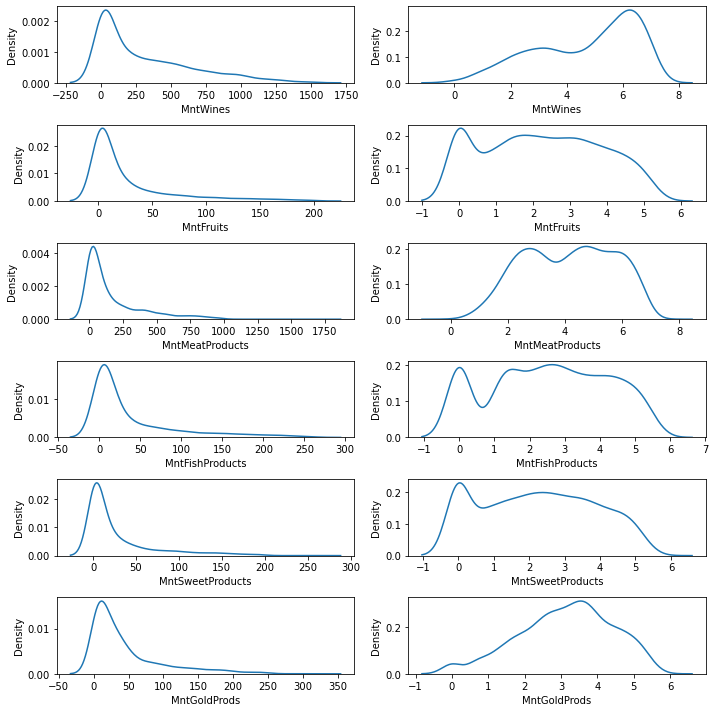

In [19]:
#Transformasi log(x + 1) dengan menambahkan kolom baru
df[mnt_col_log] = np.log(df[mnt_col] + 1)

#Perbandingan sebelum log dan setelah log
def histo(x):
    fig, ax = plt.subplots(len(x),2,figsize=(10,10))
    for i in range(0,len(x)):
        sns.kdeplot(df[x[i]],ax=ax[i,0])
        sns.kdeplot(np.log(df[x[i]]+1),ax=ax[i,1])
        
    plt.tight_layout()
    plt.show()
histo(mnt_col)

In [20]:
#Transformasi log(x + 1) dengan menambahkan kolom baru
df[mnt_col_log] = np.log(df[mnt_col] + 1)

In [21]:
df[mnt_col + mnt_col_log].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntWines_log,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,4.686567,2.247012,4.131120,2.542396,2.247480,3.128769
std,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.801605,1.569506,1.554547,1.658386,1.592604,1.283472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,3.218876,1.098612,2.833213,1.386294,0.693147,2.302585
50%,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,5.187386,2.197225,4.234107,2.564949,2.197225,3.258097
75%,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,6.230481,3.526361,5.451038,3.931826,3.555348,4.043051
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,7.309212,5.298317,7.453562,5.560682,5.572154,5.774552


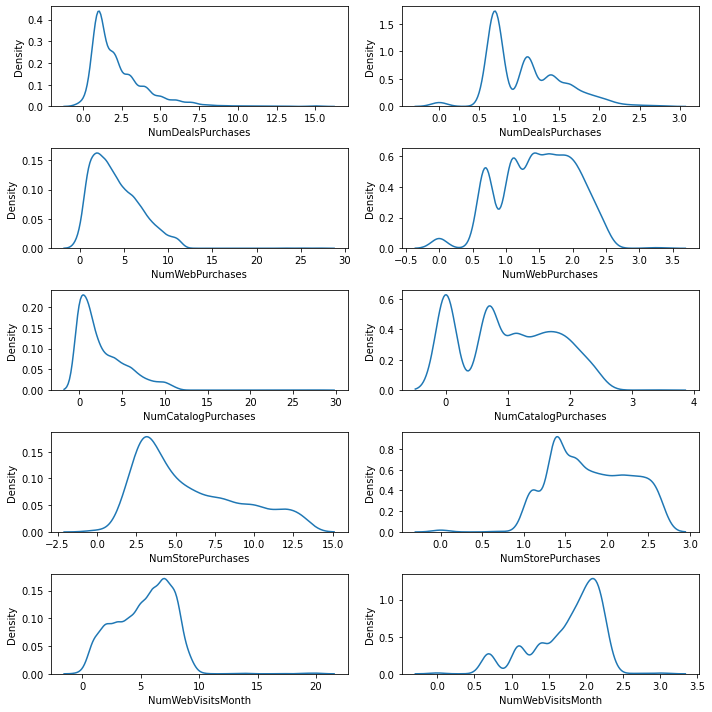

In [22]:
#Dari boxplot sebelumnya sebaran data NumPurchases terlihat positive skewed, kita lakukan coba lakukan log transformation
num_col = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
histo(num_col)

Num columns tidak kita lakukan log transformation karena cenderung tidak terlalu skewed

## Normalization
Kita aplikasikan Normalizaton kepada semua numerical kolom kecuali kolom Year_Birth,Kidhome,Teenhome, dan family Num columns yang akan kita lakukan Feature extraction terlebih dahulu

In [23]:
#Copy data untuk normalisasi dan cek correlation
df_check = df.copy()

In [24]:
# num_col_norm = ['NumDealsPurchases_norm', 'NumWebPurchases_norm', 'NumCatalogPurchases_norm', 'NumStorePurchases_norm',
#                  'NumWebVisitsMonth_norm']
# df[num_col_norm] = df[num_col]

norm_col = [i for i in df_check.columns if df_check[i].dtype != 'object']
for i in norm_col:
    df_check[i] = MinMaxScaler().fit_transform(df_check[i].values.reshape(len(df_check),1))
    
# exceptions_ = ['Year_Birth','Kidhome','Teenhome'] + num_col + mnt_col
# for i in exceptions_:
#     norm_col.remove(i)



In [25]:
df_check = df_check.drop(columns=['Z_CostContact','Z_Revenue'])
plt.figure(figsize=(30,30))
# sns.heatmap(df_check.corr(), cmap='RdYlBu', annot=True, fmt='.2f')
plt.show()

<Figure size 2160x2160 with 0 Axes>

## Feature extraction

**Ini hanya gambaran aja ya guys**<br>
- Kolom Year_Birth dapat kita ubah menjadi kolom age untuk memudahkan pengamatan
- Kolom Kidhome dan Teenhome dapat kita transformasi menjadi kolom child karena kedua kolom ini memeliki hubungan yang sama terhadap response
- Kolom monetary dari kolom Mnt family
- Kolom frequency dari kolom Num family

In [26]:
#Check apakah Kolom memiliki keterikatan seperti jika Teenhome > 0 maka Kidhome != 0
df[(df['Kidhome']==0) & (df['Teenhome']!=0)].head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_LE,MntWines_log,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,1,0,0,2,6.255750,3.761200,4.595120,0.000000,3.761200,2.708050
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,1,5.463832,4.189655,5.105945,3.931826,3.912023,3.332205
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,0,0,0,2,6.920672,4.394449,6.212606,0.000000,2.833213,5.176150


In [27]:
#Buat kolom baru childs
df['childs'] = df['Kidhome'] + df['Teenhome']

#Drop kolom Kidhome dan Teenhome
# df = df.drop(columns=['Kidhome','Teenhome'], axis=1)

In [28]:
#Buat kolom age
df['age'] = 2020 - df['Year_Birth']

#Drop kolom Year_Birth
# df = df.drop(columns='Year_Birth', axis=1)

In [29]:
#Kolom baru
df['monetary'] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntMeatProducts"] + df["MntSweetProducts"] + df["MntWines"]
df['frequency'] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumWebVisitsMonth"] + df["NumDealsPurchases"]
df['total_cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']  


In [30]:
#kolom dependencies no dependent(0) if marital 'Single', 'Together', 'Married', 'Divorced', 'Widow' and children 0
filter1 = df['childs'] == 0
filter2 = df['Marital_Status'].isin(['Single', 'Divorced', 'Widow','Alone','Absurd','YOLO'])
df['dependencies'] = np.where((filter1 & filter2), 0,1)

In [31]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log,childs,age,monetary,frequency,total_cmp,dependencies
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,6.304449,5.153292,4.488636,4.488636,0,63,1617,32,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1.945910,1.098612,0.693147,1.945910,2,66,27,11,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4.852030,4.718499,3.091042,3.761200,0,55,776,25,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3.044522,2.397895,1.386294,1.791759,1,36,53,14,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,4.779123,3.850148,3.332205,2.772589,1,39,422,24,0,1


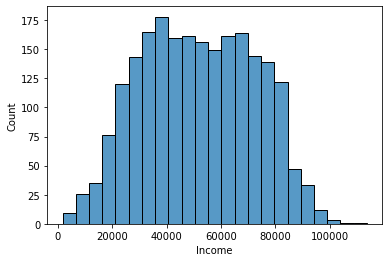

In [32]:
#Binning Income 
sns.histplot(df['Income'])
plt.show()

In [33]:
#Kita bagi income menjadi 3 kategori low, medium, high berdasarkan quantile

def income_cat(x):
    if x < df['Income'].quantile(0.3):
        return 1
    elif x < df['Income'].quantile(0.6):
        return 2
    else :
        return 3
df['income_cat'] = df['Income'].map(lambda x: income_cat(x))

## Correlation check

In [34]:
df_check = df.copy()
norm_col = [i for i in df_check.columns if df_check[i].dtype != 'object']
for i in norm_col:
    df_check[i] = MinMaxScaler().fit_transform(df_check[i].values.reshape(len(df_check),1))

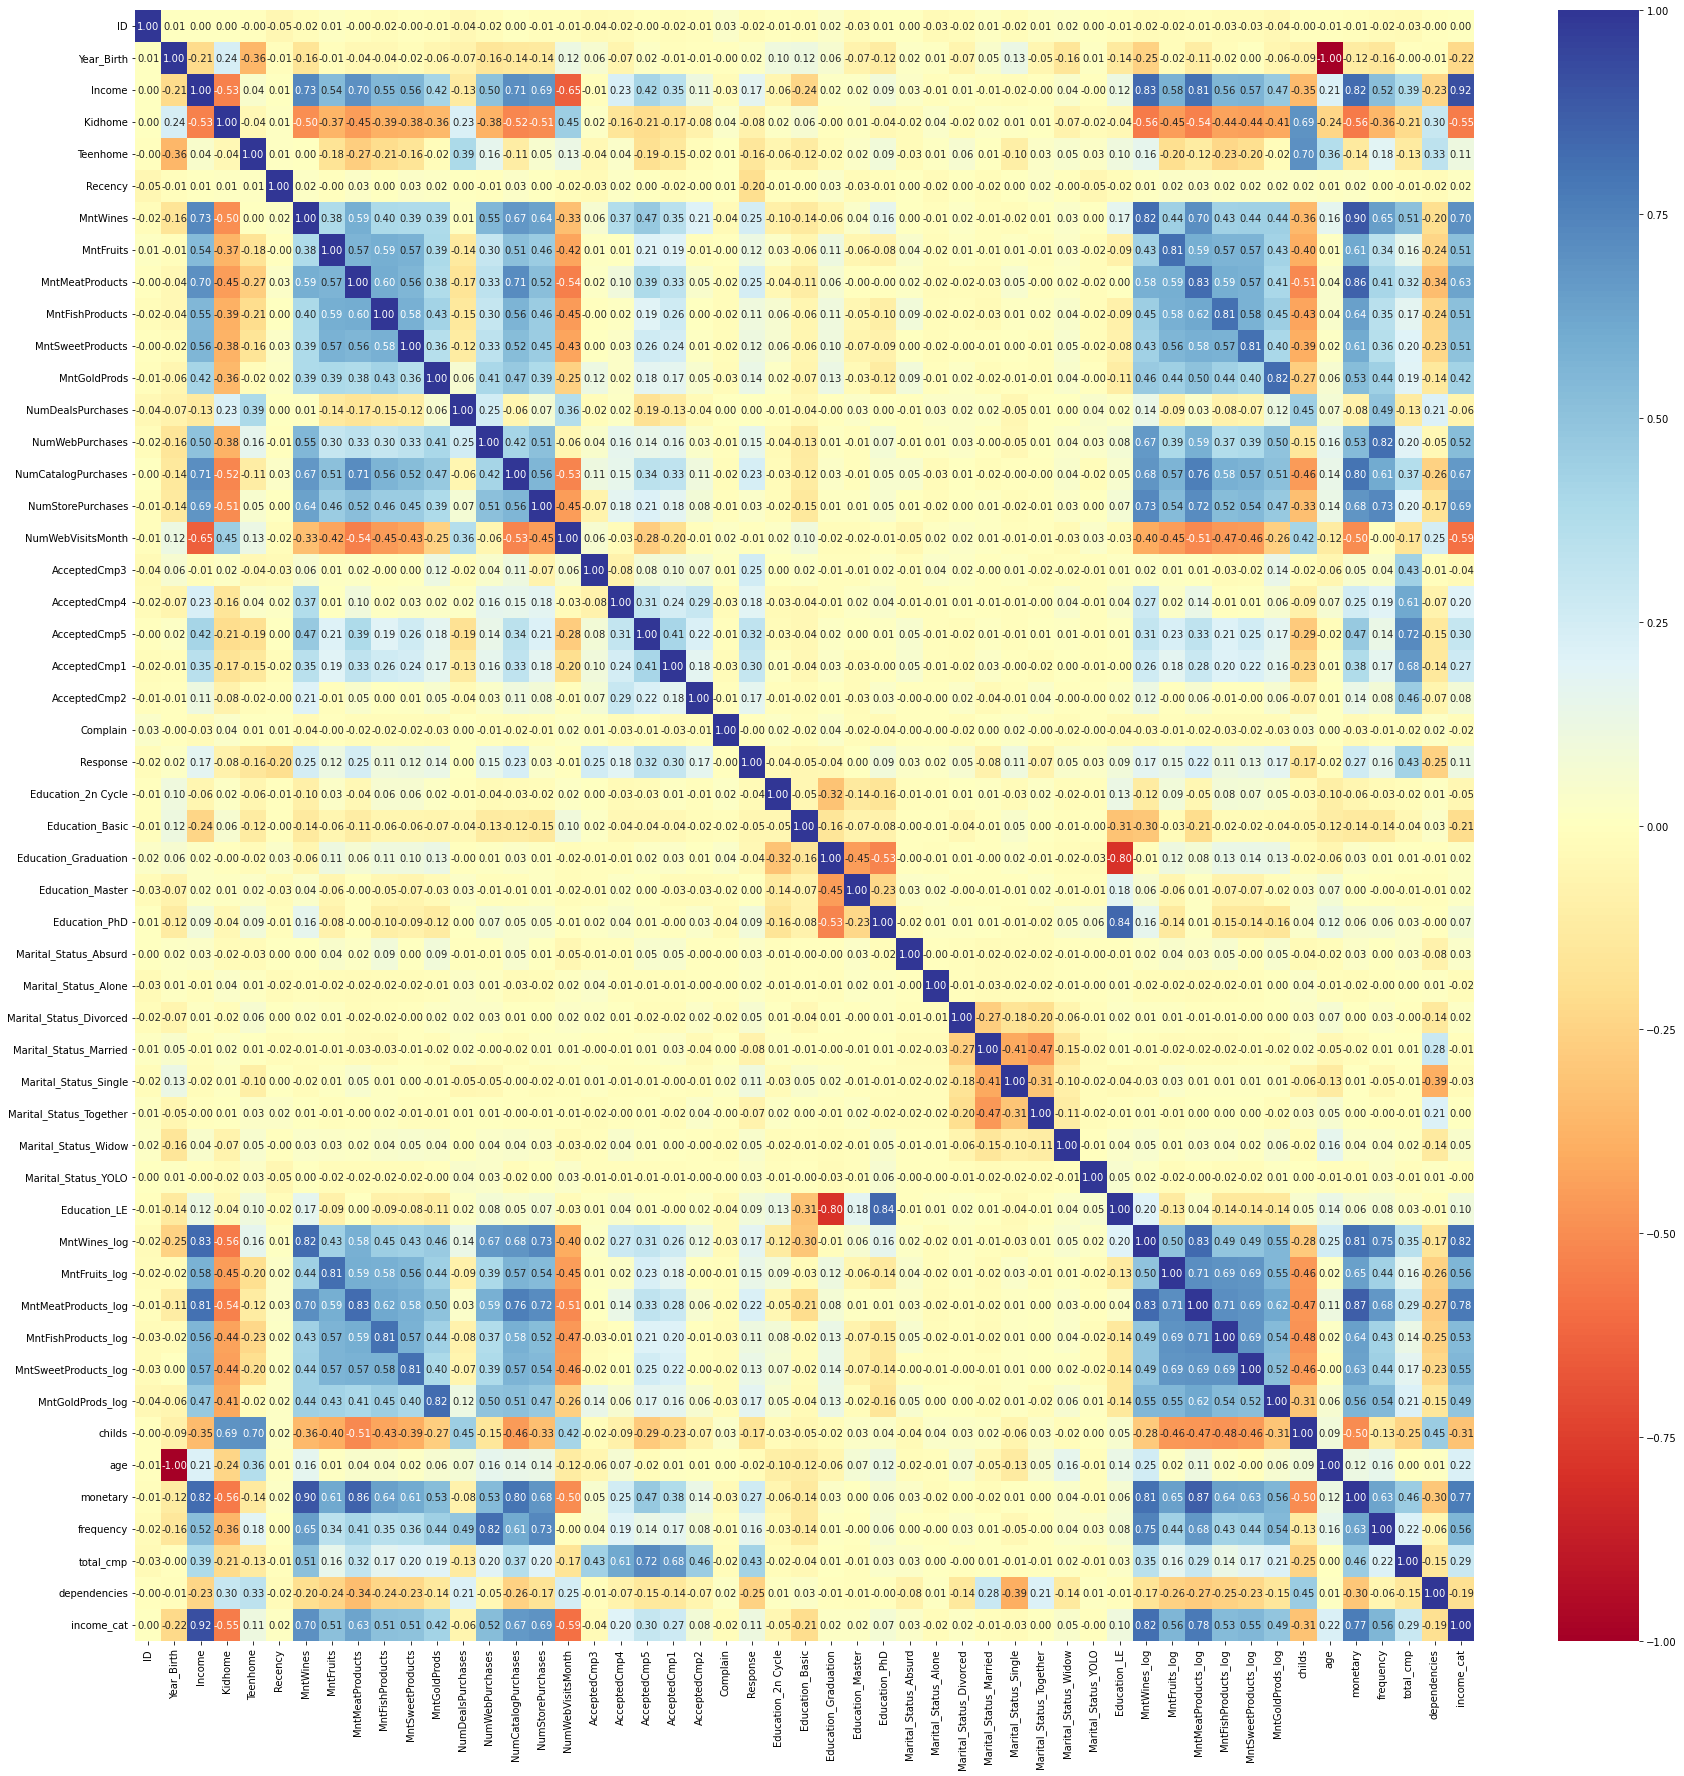

In [35]:
df_check = df_check.drop(columns=['Z_CostContact','Z_Revenue'])
plt.figure(figsize=(30,30))
sns.heatmap(df_check.corr(), cmap='RdYlBu', annot=True, fmt='.2f')
plt.show()

Terdapat beberapa improvement pada korelasi dengan adanya feature extraction :
- pada kolom childs memiliki korelasi -0.17 terhadap response sedangkan kolom pembentuknya hanya memiliki -0.15 da -0.08
- pada kolom monetary memiliki korelasi 0.27 terhadap response sedangkan korelasi pada famili kolom Mnt memiliki korelasi tertinggi pada 0.25
- pada kolom frequency memiliki korelasi 0.16 sedangkan korelasi pada famili kolom Num memiliki korelasi tertinggi pada 0.23 
- pada kolom age tidak terjadi perbedaan yang signifikan terhadap kolom pembentuknya 
- total cmp memiliki korelasi 0.43 terhadap target sedangkan famili kolom AccCmp memiliki korelasi tertinggi pada 0.32
- kolom income_cat memiliki korelasi lebih rendah dari kolom income
- kolom dependencies memiliki korelasi -0.2 lebih tinggi dari semua kolom OHE pada marital status

## Feature Selection
- kolom ID kita drop karena tidak relevan terhadap target
- kolom Z_CostContact dan Z_Revenue kita drop karena merupakan konstanta yang tidak mempengaruhi target

In [36]:
df.columns

#Data for Evaluation
df_eval = df.copy()

In [37]:
#picked columns
pick_col= ['age','Income','MntWines_log', 'MntFruits_log','MntMeatProducts_log', 'MntFishProducts_log', 
           'MntSweetProducts_log',  'MntGoldProds_log','Recency','NumWebPurchases','NumCatalogPurchases','childs','total_cmp', 
           'Education_LE','dependencies' ,'frequency','Response']
len(pick_col)

17

In [38]:
norm_col = [i for i in df.columns if df[i].dtype != 'object']
for i in norm_col:
    df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df),1))

## Handle class imbalance
Kita akan gunakan imblearn SMOTE untuk menyeimbangkan data target

In [39]:
df_pick = df[pick_col]
X = df_pick.copy()
X = X.reset_index()
X = X.drop(columns='index')
y = X.pop('Response')

In [40]:
# #Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=124,train_size=0.7)

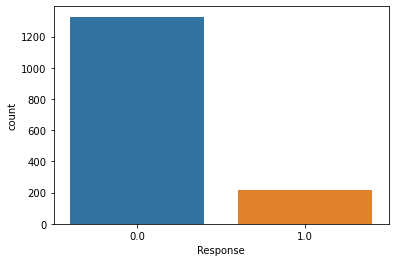

In [41]:
sns.countplot(y_train)
plt.show()

In [42]:
#kolom Dt_Customer akan kita drop karena tidak bisa digunakan untuk SMOTE dan juga tidak memiliki korelasi terhadap target
# X = X.drop(columns='Dt_Customer', axis=1) #drop karena tidak releval dengan target 

#Handling Imbalance
X_SMOTE, y_SMOTE = over_sampling.SMOTE(random_state=0).fit_resample(X_train,y_train)

In [43]:
X_SMOTE.shape

(2654, 16)

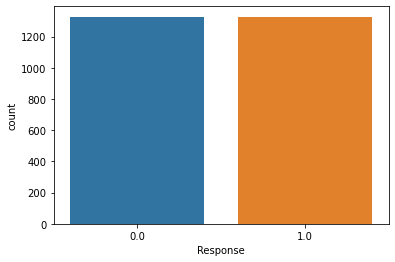

In [44]:
sns.countplot(y_SMOTE)
plt.show()

# Modelling
Karena metric project ini merupakan untuk meningkatkan Conversion Rate sehinga dibutuhkan True Positive tinggi dan False Negative rendah sehingga metric untuk pengukuran model yang terbaik adalah Recall.

## Split Data

In [45]:
#Train Data
X_SMOTE

,age,Income,MntWines_log,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log,Recency,NumWebPurchases,NumCatalogPurchases,childs,total_cmp,Education_LE,dependencies,frequency
0,0.446429,0.524633,0.883589,0.730647,0.734182,0.461265,0.537626,0.752233,0.818182,0.222222,0.392857,0.333333,0.000000,1.000000,1.0,0.675000
1,0.803571,0.118773,0.000000,0.303764,0.240390,0.349941,0.000000,0.278712,0.373737,0.037037,0.000000,0.000000,0.000000,0.333333,0.0,0.050000
2,0.589286,0.451305,0.938632,0.000000,0.573775,0.000000,0.000000,0.894405,0.242424,0.370370,0.178571,0.333333,0.000000,1.000000,1.0,0.825000
3,0.196429,0.250259,0.571113,0.303764,0.568065,0.373954,0.321556,0.500536,0.878788,0.111111,0.035714,0.333333,0.000000,0.333333,1.0,0.350000
4,0.482143,0.707314,0.910907,0.979063,0.876989,0.672160,0.598010,0.659214,0.202020,0.296296,0.178571,0.000000,0.750000,0.333333,1.0,0.675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,0.248588,0.327851,0.701037,0.262758,0.636312,0.509779,0.003279,0.509899,0.200156,0.220270,0.035714,0.333333,0.006590,0.991214,1.0,0.472364
2650,0.469003,0.759516,0.875580,0.863861,0.888659,0.767905,0.683479,0.595795,0.706563,0.179983,0.183588,0.000000,0.214884,1.000000,0.0,0.310535
2651,0.344239,0.320745,0.470511,0.119789,0.384101,0.000000,0.244435,0.464888,0.149688,0.074074,0.035714,0.361449,0.000000,0.333333,1.0,0.200000
2652,0.875343,0.801852,0.977903,0.607225,0.882832,0.817353,0.613267,0.673750,0.470085,0.331909,0.249313,0.000000,0.254808,0.673077,0.0,0.599519


In [46]:
#Test Data
X_test

,age,Income,MntWines_log,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log,Recency,NumWebPurchases,NumCatalogPurchases,childs,total_cmp,Education_LE,dependencies,frequency
627,0.446429,0.399388,0.697731,0.207351,0.498228,0.395136,0.445951,0.430320,0.565657,0.111111,0.035714,0.666667,0.00,1.000000,1.0,0.425
288,0.321429,0.398620,0.497671,0.000000,0.516551,0.289432,0.248790,0.000000,0.898990,0.074074,0.035714,0.333333,0.00,1.000000,1.0,0.125
182,0.339286,0.264482,0.328065,0.000000,0.321711,0.249303,0.124395,0.360104,0.242424,0.037037,0.035714,0.666667,0.00,0.333333,1.0,0.200
101,0.303571,0.674690,0.828330,0.897189,0.762075,0.571522,0.643112,0.758851,0.464646,0.222222,0.214286,0.333333,0.00,0.333333,1.0,0.525
1940,0.428571,0.560194,0.813415,0.676350,0.691386,0.727078,0.801469,0.786779,0.595960,0.296296,0.071429,0.333333,0.00,0.333333,1.0,0.525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0.303571,0.790775,0.874042,0.925817,0.894636,0.634160,0.880319,0.703162,0.070707,0.185185,0.214286,0.000000,0.25,0.333333,1.0,0.350
241,0.392857,0.260428,0.440386,0.000000,0.294789,0.000000,0.000000,0.120035,0.353535,0.037037,0.000000,0.333333,0.00,1.000000,1.0,0.150
1524,0.375000,0.317435,0.339969,0.130824,0.147394,0.197568,0.124395,0.336980,0.464646,0.000000,0.000000,0.666667,0.00,0.666667,1.0,0.100
730,0.428571,0.729554,0.855346,0.709886,0.886918,0.723895,0.725581,0.769350,0.898990,0.222222,0.357143,0.000000,0.00,1.000000,1.0,0.450


## Modelling

In [103]:
def cm_model(x):
    x.fit(X_SMOTE, y_SMOTE)
    
    pre_train = x.predict(X_SMOTE)
    cm_train = confusion_matrix(y_SMOTE, pre_train, labels=x.classes_)
    
    pre_test = x.predict(X_test)
    cm_test = confusion_matrix(y_test, pre_test, labels=x.classes_)
    
    return cm_train,cm_test
def cm_plot(x):
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_model(x)[0],
                          display_labels=x.classes_)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_model(x)[1],
                          display_labels=x.classes_)
    
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    disp_train.plot(ax=ax[0])
    disp_test.plot(ax=ax[1])
    ax[0].set_title('train')
    ax[0].text(0,0.2,'TN')
    ax[0].text(1,0.2,'FP')
    ax[0].text(0,0.8,'FN')
    ax[0].text(1,0.8,'TP')
                
    ax[1].set_title('test')
    ax[1].set_title('train')
    ax[1].text(0,0.2,'TN')
    ax[1].text(1,0.2,'FP')
    ax[1].text(0,0.8,'FN')
    ax[1].text(1,0.8,'TP')
    plt.tight_layout()
    plt.show()
    
def cv_prec(x,model):
    score_accu = cross_validate(x, X,y, cv=5, scoring='accuracy', return_train_score=True)
    score_prec = cross_validate(x, X,y, cv=5, scoring='precision', return_train_score=True)
    
    train_precision = [round(score_prec['train_score'].mean(),4)]
    test_precision = [round(score_prec['test_score'].mean(),4)]
    
    train_accuracy = [round(score_accu['train_score'].mean(),4)]
    test_accuracy = [round(score_accu['test_score'].mean(),4)]
    cv_df = pd.DataFrame({'model':model,'train_precision':train_precision,'test_precision':test_precision,
                         'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
    return cv_df

### LogisticRegression

In [48]:
LR = LogisticRegression(random_state=0)
cv_lr = cv_prec(LR,'LogisticRegression')
cv_lr

,model,train_precision,test_precision,train_accuracy,test_accuracy
0,LogisticRegression,0.771,0.7547,0.8857,0.8834


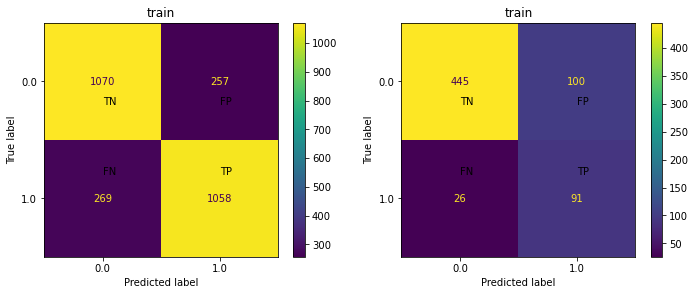

In [49]:
cm_plot(LR)

Pada model LogisticRegression score yang seimbang antara train dan test sehingga dapat mendapatkan best fit denga nilai 0.77.

### RandomForestClassifier

In [50]:
RF = RandomForestClassifier(random_state=0)
cv_rf = cv_prec(RF,'RandomForestClassifier')
cv_rf

,model,train_precision,test_precision,train_accuracy,test_accuracy
0,RandomForestClassifier,0.9848,0.682,0.9927,0.8771


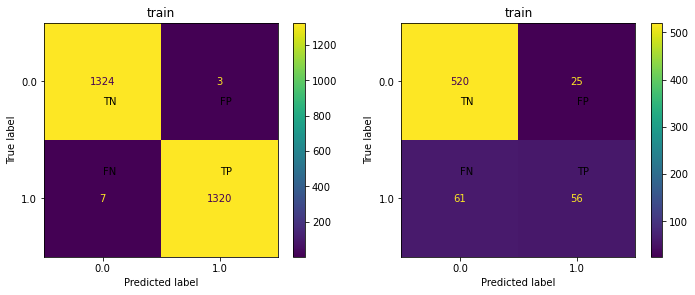

In [51]:
cm_plot(RF)

Pada model RandomForest memiliki score precision yang sangat berbeda pada train dan test sehingga model overfit.

### DecisionTreeClassifier

In [52]:
DT = DecisionTreeClassifier(random_state=0)
cv_dt = cv_prec(DT,'DecisionTreeClassifier')
cv_dt

,model,train_precision,test_precision,train_accuracy,test_accuracy
0,DecisionTreeClassifier,0.9977,0.4322,0.9927,0.8304


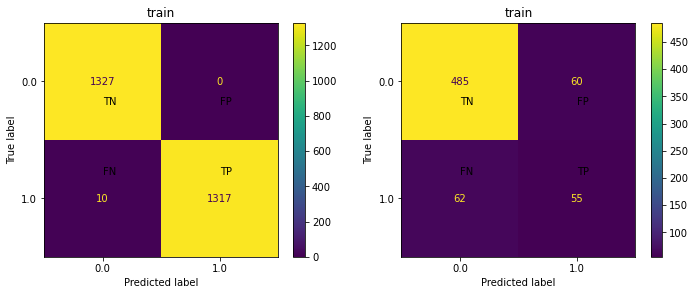

In [53]:
cm_plot(DT)

Pada model DecisionTree memiliki score precision yang sangat berbeda terhadap train dan test sehingga model overfit.

### XGBClassifier

In [54]:
XG = XGBClassifier(random_state=0)
cv_xg = cv_prec(XG,'XGBClassifier')
cv_xg

,model,train_precision,test_precision,train_accuracy,test_accuracy
0,XGBClassifier,0.9833,0.6152,0.9927,0.873


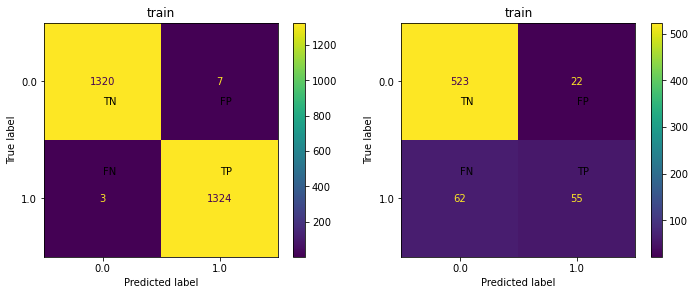

In [55]:
cm_plot(XG)

Pada model XGBClassifier memiliki score precision yang sangat berbeda terhadap train dan test sehingga model overfit.

### LGBMClassifier

In [56]:
LG = LGBMClassifier(random_state=0)
cv_lg = cv_prec(LG,'LGBMClassifier')
cv_lg

,model,train_precision,test_precision,train_accuracy,test_accuracy
0,LGBMClassifier,0.9803,0.617,0.9927,0.8707


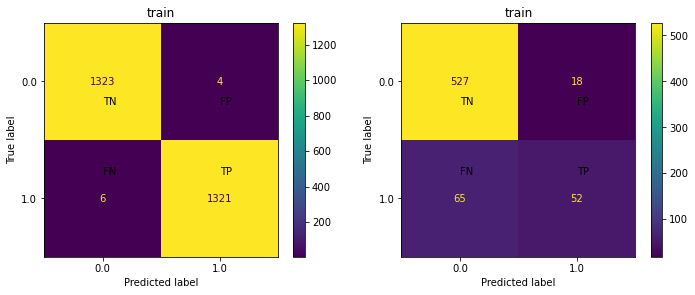

In [57]:
cm_plot(LG)

Pada model LGBMClassifier memiliki score precision yang sangat berbeda terhadap train dan test sehingga model overfit.

## Model Evaluation

Karena metric project ini merupakan untuk meningkatkan Conversion Rate sehinga dibutuhkan True Positive tinggi dan False Negative rendah sehingga metric untuk pengukuran model yang terbaik adalah Precision.

In [58]:
all_eval = pd.concat([cv_lr,cv_rf,cv_dt,cv_xg,cv_lg],axis=0)
all_eval

,model,train_precision,test_precision,train_accuracy,test_accuracy
0,LogisticRegression,0.7710,0.7547,0.8857,0.8834
0,RandomForestClassifier,0.9848,0.6820,0.9927,0.8771
0,DecisionTreeClassifier,0.9977,0.4322,0.9927,0.8304
0,XGBClassifier,0.9833,0.6152,0.9927,0.8730
0,LGBMClassifier,0.9803,0.6170,0.9927,0.8707


**highlight 3 model**

In [59]:
#buat kolom precision difference
all_eval['precision_diff'] = abs(all_eval['train_precision']-all_eval['test_precision'])
all_eval.sort_values(by='precision_diff')

,model,train_precision,test_precision,train_accuracy,test_accuracy,precision_diff
0,LogisticRegression,0.7710,0.7547,0.8857,0.8834,0.0163
0,RandomForestClassifier,0.9848,0.6820,0.9927,0.8771,0.3028
0,LGBMClassifier,0.9803,0.6170,0.9927,0.8707,0.3633
0,XGBClassifier,0.9833,0.6152,0.9927,0.8730,0.3681
0,DecisionTreeClassifier,0.9977,0.4322,0.9927,0.8304,0.5655


Dari data evaluasi model di atas kita pilih model terbaik dengan menggunakan precision diff untuk mendapatkan model yang best fit. 3 model terbaik untuk case ini adalah LogisticRegression, RandomForestClassifier, LGBMClassifier selanjutnya akan kita lakukan Hyperparameter tuning.

## Hyperparameter tuning

### LogisticRegression hyperparameter tuning

In [120]:
# Define the hyperparameters grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2','elasticnet', None],
    'solver': ['liblinear', 'saga','lbfgs','newton-cg','newton-cholesky','sag']
}


In [115]:
# Create GridSearchCV object
gs_lr = GridSearchCV(LR, param_grid_lr, cv=5)

# Fit the GridSearchCV object to the data
gs_lr.fit(X,y)

# Print the best hyperparameters found
print("Best hyperparameters: ", gs_lr.best_params_)

Best hyperparameters:  {'C': 0.001, 'penalty': None, 'solver': 'saga'}


In [116]:
best_LR = LogisticRegression(random_state=0,**gs_lr.best_params_)
# best_LR = LogisticRegression(random_state=0,C=0.01,solver='saga',penalty='l1')

cv_best_lr = cv_prec(best_LR,'LogisticRegression')
cv_best_lr

,model,train_precision,test_precision,train_accuracy,test_accuracy
0,LogisticRegression,0.7176,0.7007,0.8848,0.8807


### RandomForestClassifier hyperparameter tuning

In [63]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [64]:
# Create GridSearchCV object
gs_rf = GridSearchCV(RF, param_grid_rf, cv=5)

# Fit the GridSearchCV object to the data
gs_rf.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters: ", gs_rf.best_params_)

Best hyperparameters:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [65]:
best_RF = RandomForestClassifier(random_state=0,**gs_rf.best_params_)
cv_best_rf = cv_prec(best_RF,'RandomForestClassifier')
cv_best_rf

,model,train_precision,test_precision,train_accuracy,test_accuracy
0,RandomForestClassifier,0.9892,0.7386,0.9619,0.8844


### LGBMClassifier hyperparameter tuning

In [66]:
param_grid_lg = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [5, 10, 15],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0]
}

In [101]:
# Create GridSearchCV object
gs_lg = GridSearchCV(LG, param_grid_lg, cv=5)

# Fit the GridSearchCV object to the data
gs_lg.fit(X_SMOTE,y_SMOTE)

# Print the best hyperparameters found
print("Best hyperparameters: ", gs_lg.best_params_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 15, 'min_child_samples': 10, 'num_leaves': 40, 'subsample': 0.8}


In [100]:
best_LG = LGBMClassifier(random_state=0,**gs_lg.best_params_)
cv_best_lg = cv_prec(best_LG,'LGBMClassifier')
cv_best_lg

,model,train_precision,test_precision,train_accuracy,test_accuracy
0,LGBMClassifier,0.9968,0.9395,0.9968,0.9348


### Hyperparameter evaluation

In [69]:
hyp_df = pd.concat([cv_best_lr,cv_best_rf,cv_best_lg],axis=0)
hyp_df

,model,train_precision,test_precision,train_accuracy,test_accuracy
0,LogisticRegression,0.7408,0.7293,0.8854,0.8834
0,RandomForestClassifier,0.9892,0.7386,0.9619,0.8844
0,LGBMClassifier,0.9855,0.6551,0.9927,0.8803


Dari hasil hyperparameter tuning pada 3 model, LogisticRegression mendapatkan hasil paling sesuai karena memiliki best fit dibandingkan RandomForestClassifier dan LGBMClassifier, dengan nilai precision 0.73 dan accuracy 0.88.

## Feature Importance

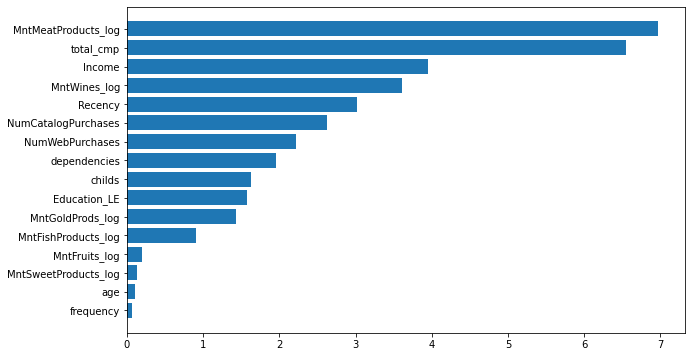

In [130]:
best_LR.fit(X,y)
importance = best_LR.coef_[0]
importance = [abs(i) for i in importance]
df_importance = pd.DataFrame({'feature':X.columns,'importance':importance})
df_importance = df_importance.sort_values(by='importance',ascending=True)
plt.figure(figsize=(10,6))
plt.barh(df_importance['feature'], df_importance['importance'])
# plt.barh(X.columns, importance)

plt.show()

In [124]:
importance

[0.11204121447324263,
 3.949269482974136,
 3.6075964614372156,
 0.19214601154552632,
 6.972648393987939,
 0.9047830109818847,
 0.13140774168675562,
 1.426062123022888,
 3.024324413122083,
 2.222225229942818,
 2.6282663394044303,
 1.6332034317742221,
 6.5519487903952465,
 1.57523839634513,
 1.956535343053328,
 0.06226867891220177]

In [122]:
importance

array([ 0.        , -2.93863014, -2.54719121,  0.08300228,  5.24271918,
       -0.55636251,  0.        ,  1.30804058, -2.8046355 ,  0.93051538,
        0.80219345,  1.08032535,  6.02516994,  1.36419716, -1.76906145,
        0.52329318])

### Insight

Dari visualiasi feature importance pada model terbaik dapat kita ketahui beberapa feature dengan dampak yang tinggi pada Response(target). Feature yang berdampak tinggi dan berkorelasi positif adalah total_cmp, MntMeatProduct. Sedangkan feature yang berkorelasi negatif rendah adalah Income, Recency, dan MntWines.

### Rekomendasi

Rekomendasi action yang dilakukan pada next campaign adalah :
- melakukan filter target marketing hanya pada customer yang menerima total campaign > 2 dan total spend pada produk mean 297.2 - 1725.0 .
- karena total spend produk pada meat memilki pengaruh tinggi pada response kita dapat menstimulasi peningkatan total spend meat dengan memberikan diskon pada produk tersebut.
- memberikan konten edukasi pada product meat sehingga customer akan cenderung membeli produk tersebut.


### Insight

In [71]:
insigth_df = df_eval[['total_cmp','MntMeatProducts_log','MntMeatProducts','Income','Recency','MntWines_log','MntWines','Response']]
insigth_df.head()

,total_cmp,MntMeatProducts_log,MntMeatProducts,Income,Recency,MntWines_log,MntWines,Response
0,0,6.304449,546,58138.0,58,6.455199,635,1
1,0,1.945910,6,46344.0,38,2.484907,11,0
2,0,4.852030,127,71613.0,26,6.056784,426,0
3,0,3.044522,20,26646.0,26,2.484907,11,0
4,0,4.779123,118,58293.0,94,5.159055,173,0


#### Analyze total_cmp

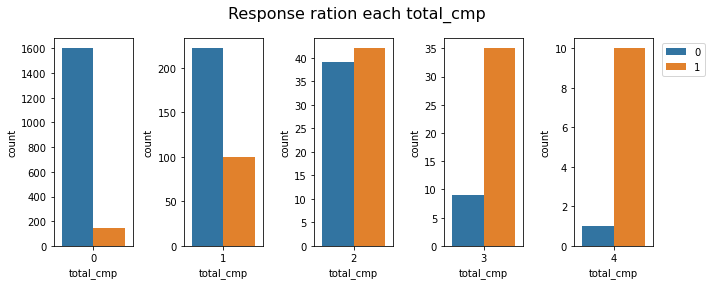

In [72]:
#Analyze total_cmp

fig,ax = plt.subplots(1,(len(insigth_df['total_cmp'].unique())),figsize=(10,4))
for i in insigth_df['total_cmp'].unique():
    df = insigth_df[insigth_df['total_cmp']==i]
    sns.countplot(data=df,x='total_cmp',hue='Response',ax=ax[i])
    if i != 4:
        ax[i].get_legend().remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('Response ration each total_cmp',fontsize=16)
plt.tight_layout()
plt.show()

Ratio customer meresponse bertambah setiap jumlah campaign naik.

In [73]:
res_0 = []
res_1 = []
for i in insigth_df['total_cmp'].unique():
    val_0 = insigth_df[(insigth_df['total_cmp']==i) & (insigth_df['Response']==0)].shape[0]
    val_1 = insigth_df[(insigth_df['total_cmp']==i) & (insigth_df['Response']==1)].shape[0]
    res_0.append(val_0)
    res_1.append(val_1)
df_tot = pd.DataFrame({'total_cmp':insigth_df['total_cmp'].unique(),'Response_0':res_0,'Response_1':res_1})
df_tot['ratio'] = df_tot['Response_1']/df_tot['Response_0']
df_tot

,total_cmp,Response_0,Response_1,ratio
0,0,1601,146,0.091193
1,1,222,100,0.450450
2,2,39,42,1.076923
3,3,9,35,3.888889
4,4,1,10,10.000000


Pada feature total_cmp customer yang cenderung memberikan response adalah customer yang menerima campaign > 2.

#### Analyze MntMeatProducts

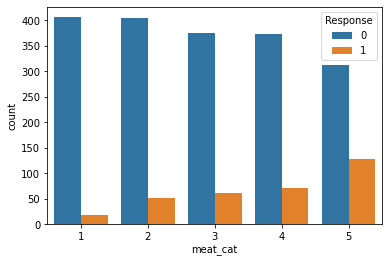

In [74]:
#Create segment for MntMeatProducts based on quantile
#Divided to 5 segment



def cat_meat(x):
    if x <insigth_df['MntMeatProducts'].quantile(1/5):
        return 1
    elif x < insigth_df['MntMeatProducts'].quantile(2/5):
        return 2
    elif x < insigth_df['MntMeatProducts'].quantile(3/5):
        return 3
    elif x < insigth_df['MntMeatProducts'].quantile(4/5):
        return 4
    else :
        return 5
insigth_df['meat_cat'] = insigth_df['MntMeatProducts'].map(lambda x: cat_meat(x) )
sns.countplot(data=insigth_df,x='meat_cat',hue='Response')
plt.show()

In [75]:
segmen = []
for i in list(range(1,6)):
    if i == 1:
        val = f"{insigth_df['MntMeatProducts'].min()} - <{round(insigth_df['MntMeatProducts'].quantile(i/5),2)}"
        segmen.append(val)
    elif i==5:
        val = f"{round(insigth_df['MntMeatProducts'].quantile((i-1)/5),2)} - {insigth_df['MntMeatProducts'].quantile(i/5)}"
        segmen.append(val)
    else :
        val = f"{round(insigth_df['MntMeatProducts'].quantile((i-1)/5),2)} - <{round(insigth_df['MntMeatProducts'].quantile(i/5),2)}"
        segmen.append(val)      
segmen

['0 - <12.0',
 '12.0 - <36.6',
 '36.6 - <109.0',
 '109.0 - <297.2',
 '297.2 - 1725.0']

In [76]:
res_0 = []
res_1 = []
for i in insigth_df['meat_cat'].unique():
    val_0 = insigth_df[(insigth_df['meat_cat']==i) & (insigth_df['Response']==0)].shape[0]
    val_1 = insigth_df[(insigth_df['meat_cat']==i) & (insigth_df['Response']==1)].shape[0]
    res_0.append(val_0)
    res_1.append(val_1)
df_meat = pd.DataFrame({'meat_cat':insigth_df['meat_cat'].unique(),'Response_0':res_0,'Response_1':res_1})
df_meat['ratio'] = df_meat['Response_1']/df_meat['Response_0']
df_meat = df_meat.sort_values(by='meat_cat')
df_meat['segmen_cat'] = segmen
df_meat = df_meat.sort_values(by='ratio',ascending=False)
df_meat

,meat_cat,Response_0,Response_1,ratio,segmen_cat
0,5,312,129,0.413462,297.2 - 1725.0
2,4,373,71,0.190349,109.0 - <297.2
4,3,376,62,0.164894,36.6 - <109.0
3,2,405,52,0.128395,12.0 - <36.6
1,1,406,19,0.046798,0 - <12.0


Pada feature MntMeatProducts customer yang memiliki spend tinggi pada range 297.2 - 1725.0 cenderung merespon campaign

### Recommendation

Rekomendasi action yang dilakukan pada next campaign adalah :
- melakukan filter target marketing hanya pada customer yang menerima total campaign > 2 dan total spend pada produk mean 297.2 - 1725.0 .
- karena total spend produk pada meat memilki pengaruh tinggi pada response kita dapat menstimulasi peningkatan total spend meat dengan memberikan diskon pada produk tersebut.
- memberikan konten edukasi pada product meat sehingga customer akan cenderung membeli produk tersebut.
